In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

In [2]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## mean_revenue, mean_budget over the year

In [4]:
yearly_stats = df.groupby('release_year').mean().reset_index()

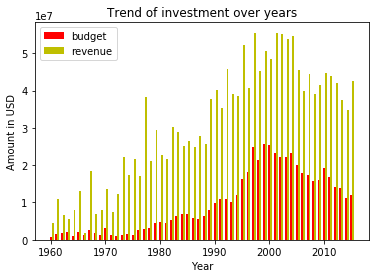

In [5]:

budget_means = yearly_stats['budget']


ind = np.arange(1960,2016)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, budget_means, width, color='r')

revenue_means = yearly_stats['revenue']

rects2 = ax.bar(ind + width, revenue_means, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Amount in USD')
ax.set_xlabel('Year')
ax.set_title('Trend of investment over years')


ax.legend((rects1[0], rects2[0]), ('budget', 'revenue'))



plt.show()

## companys most produced genre

In [6]:
yearly_profit = np.subtract(yearly_stats['revenue'],yearly_stats['budget'])

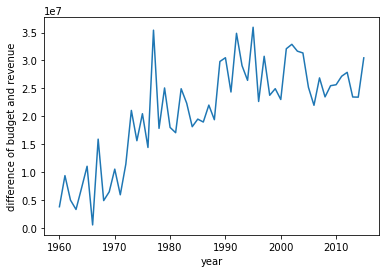

In [25]:
plt.plot(yearly_stats['release_year'],yearly_profit)
plt.xlabel('year')
plt.ylabel('difference of budget and revenue')

In [8]:
df['profit'] = np.subtract(df['revenue'],df['budget'])

In [31]:
df['production_companies']

0        Universal Studios|Amblin Entertainment|Legenda...
1        Village Roadshow Pictures|Kennedy Miller Produ...
2        Summit Entertainment|Mandeville Films|Red Wago...
3                Lucasfilm|Truenorth Productions|Bad Robot
4        Universal Pictures|Original Film|Media Rights ...
5        Regency Enterprises|Appian Way|CatchPlay|Anony...
6                  Paramount Pictures|Skydance Productions
7        Twentieth Century Fox Film Corporation|Scott F...
8            Universal Pictures|Illumination Entertainment
9        Walt Disney Pictures|Pixar Animation Studios|W...
10                            Columbia Pictures|Danjaq|B24
11       Village Roadshow Pictures|Dune Entertainment|A...
12       DNA Films|Universal Pictures International (UP...
13             Columbia Pictures|Happy Madison Productions
14       Marvel Studios|Prime Focus|Revolution Sun Studios
15       Double Feature Films|The Weinstein Company|Fil...
16       Twentieth Century Fox Film Corporation|M6 Film.

## Most number of Genres produced by a Company

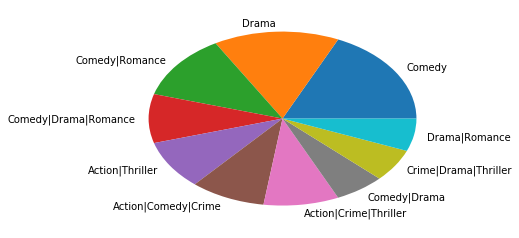

In [32]:
x=df[df['production_companies'] == 'Warner Bros.']['genres'].value_counts()[0:10]
plt.pie(x,labels=x.index.tolist()); 

## most revenue producing genres for a  production company

In [11]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
profit                     0
dtype: int64

In [12]:
df =df.drop(['homepage','keywords','tagline'],axis =1)

In [13]:
df = df.dropna(how='any',axis=0) 

In [14]:
df.shape

(9771, 19)

In [21]:
def revenue_genre(company):
    company = df[df['production_companies'] == company]
    com_gen= company.groupby('genres').mean().reset_index()
    com_gen.sort_values('profit',ascending=False,inplace=True)
    return plt.pie(com_gen['profit'][0:10],labels=com_gen['genres'][0:10]);

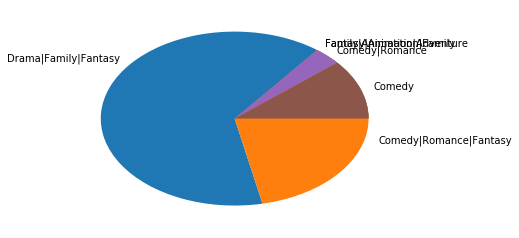

In [33]:
revenue_genre('Universal Studios');

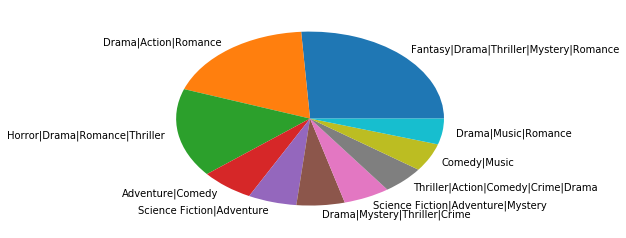

In [34]:
revenue_genre('Paramount Pictures');

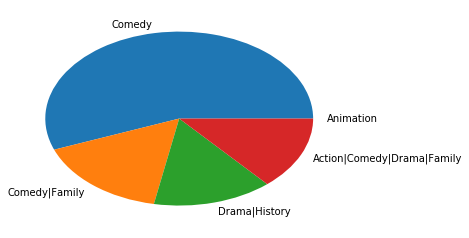

In [35]:
revenue_genre('Walt Disney');

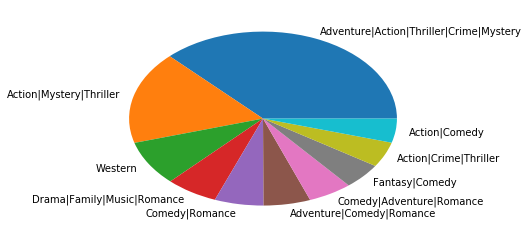

In [36]:
revenue_genre('Warner Bros.');